In [17]:
import cv2
import pandas as pd

img1 = cv2.imread("./hw4/soccer1.jpg")
img1_df = pd.DataFrame(img1.reshape(-1,3),columns=["r","g","b"])
img1_mask = cv2.imread("./hw4/soccer1_mask.png")
mask_df = pd.DataFrame(img1_mask.reshape(-1,3),columns=["r","g","b"])
#print(mask_df)
#mask_df.to_csv("mask.csv")


In [81]:
import numpy as np
s = pd.Series(np.zeros(len(img1_df.index)))
s
img1_df["isGround"] = np.zeros(len(img1_df.index))
#img1_df = img1_df.astype({"isGround":int})
for i in range(len(img1_df.index)):
    if mask_df.at[i,"r"] == 0:
        img1_df.at[i,"isGround"] = 0
img1_df

,r,g,b,isGround,predict
0,147,118,113,0.0,0
1,151,129,123,0.0,0
2,134,125,115,0.0,0
3,147,144,130,0.0,0
4,193,185,172,0.0,0
...,...,...,...,...,...
89995,60,122,100,0.0,1
89996,60,122,100,0.0,1
89997,60,122,100,0.0,1
89998,60,122,100,0.0,1


In [82]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt


X = img1_df[["r","g","b"]]
Y = img1_df["isGround"]
print(img1_df.loc[:, "r"])
print(Y)

M1 = GMM(n_components=2)
M1.fit(img1_df, Y)
result = M1.predict(img1_df)
img1_df["predict"] = result

0        147
1        151
2        134
3        147
4        193
        ... 
89995     60
89996     60
89997     60
89998     60
89999     59
Name: r, Length: 90000, dtype: uint8
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
89995    0.0
89996    0.0
89997    0.0
89998    0.0
89999    0.0
Name: isGround, Length: 90000, dtype: float64


/tmp/ipykernel_6781/1098020126.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


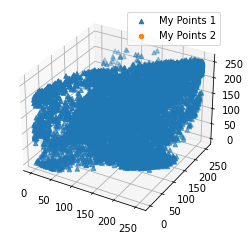

In [83]:

fig = plt.figure()
ax = fig.gca(projection='3d')
img1_df.to_csv("result.csv")
ax.scatter(img1_df.loc[img1_df["isGround"] == 0, "r"], img1_df.loc[img1_df["isGround"] == 0, "g"], img1_df.loc[img1_df["isGround"] == 0,"b"], cmap='Reds', marker='^', label='My Points 1')
ax.scatter(img1_df.loc[img1_df["isGround"] == 1, "r"], img1_df.loc[img1_df["isGround"] == 1, "g"], img1_df.loc[img1_df["isGround"] == 1,"b"], cmap='Blues', marker='o', label='My Points 2')
# 顯示圖例
ax.legend()

# 顯示圖形
plt.show()

0.8513111111111111


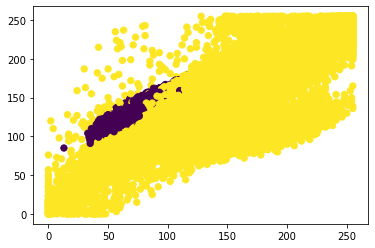

In [84]:
from sklearn.metrics import accuracy_score 
'''
for i in range(result.size):
    if result[i] == 1:
        result[i] = 0
    else:
        result[i] = 1
'''
    

p2 = plt.scatter(X.loc[:, "r"], X.loc[:, "g"], c=result, s=40, cmap='viridis')

print(accuracy_score(Y,result))